In [1]:
import pandas as pd
from feature_clustering.feature_clustering import FeatureCluster

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
target = "Survived"
data["SexEncoded"] = (data["Sex"] == "female").astype(int)
data["EmbarkedEncoded"] = (data["Embarked"] == "S").astype(int)

data = data.dropna()
features = ["Pclass", "SexEncoded", "Age", "SibSp", "Parch", "Fare", "EmbarkedEncoded"]

feature_cluster = FeatureCluster(k="auto")
feature_cluster.fit(data[features], data[target])

KMeans with k '2' has a silhouette coefficient of '0.09736374446453873'


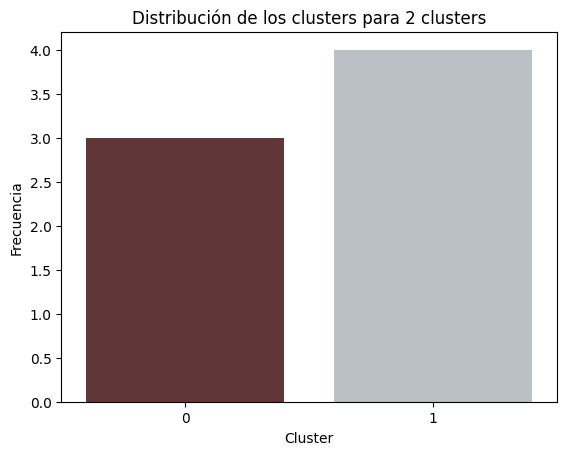

In [4]:
feature_cluster.plot()

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\feature_clustering\feature_clustering.py:64: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


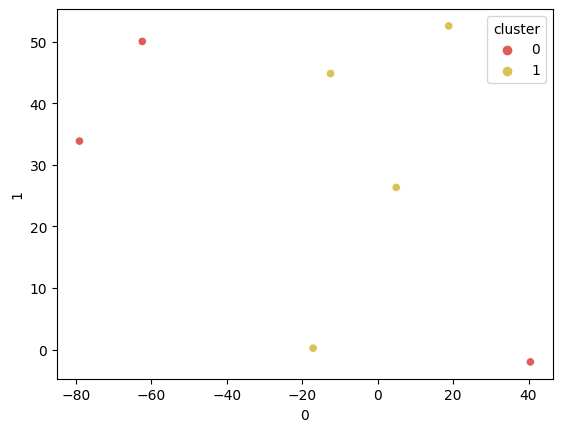

In [5]:
feature_cluster.plot(plot_type="tsne", perplexity=3)

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\feature_clustering\feature_clustering.py:71: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


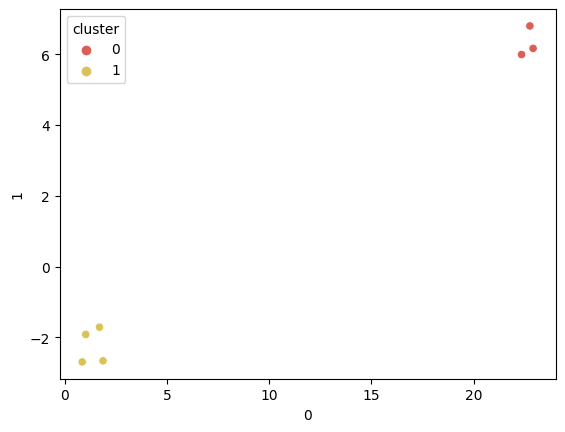

In [6]:
feature_cluster.plot(plot_type="umap")

In [7]:
feature_cluster.score()

{'Silhouette Coefficient': 0.09907706741999002,
 'Calinski-Harabasz Index': 1.742742058828341,
 'Davies-Bouldin Index': 1.6778227594850408,
 'Dunn Index': 0.8353904274128826}

In [8]:
feature_cluster.get_feature_clusters()

{0: ['Pclass', 'Age', 'EmbarkedEncoded'],
 1: ['SexEncoded', 'SibSp', 'Parch', 'Fare']}

In [9]:
best_features_mi = feature_cluster.select_best_features(strategy="mutual-information")

Computing cluster 0
Computing cluster 1


In [10]:
best_features_mi

{0: ['Age'], 1: ['SexEncoded', 'Fare']}

In [11]:
best_features_ffs = feature_cluster.select_best_features(strategy="forward-feature-selection")

['Age']
best_auc 0.6754658385093167 auc_actual 0
['SexEncoded']
best_auc 0.7701863354037267 auc_actual 0.6754658385093167
['Pclass']
best_auc 0.7763975155279503 auc_actual 0.7701863354037267
['Parch']
best_auc 0.7763975155279503 auc_actual 0.7763975155279503
['Age']
best_auc 0.7841614906832297 auc_actual 0.7763975155279503
['Fare']
best_auc 0.7763975155279503 auc_actual 0.7841614906832297


In [12]:
best_features_ffs

{0: ['Pclass', 'Age'], 1: ['SexEncoded', 'Parch', 'Fare']}